In [1]:
%matplotlib inline
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.style.use('seaborn-white')

import multiprocess as mp
import numpy as np
import pandas as pd
import bioframe
import cooltools
import cooler

In [12]:
mm10 = bioframe.fetch_chromsizes('mm10')
chromsizes = bioframe.fetch_chromsizes('mm10')
chromosomes = list(chromsizes.index)

In [5]:
binsize = 80000
bins = cooler.binnify(mm10, binsize)
fasta_records = bioframe.load_fasta('/home/data4/jh/data/reference/Mus_musculus/UCSC/mm10/Sequence/WholeGenomeFasta/genome.fa')
bins['GC'] = bioframe.tools.frac_gc(bins, fasta_records)
bins.head()

,chrom,start,end,GC
0,chr1,0,80000,NaN
1,chr1,80000,160000,NaN
2,chr1,160000,240000,NaN
3,chr1,240000,320000,NaN
4,chr1,320000,400000,NaN


Text(0.5, 1.0, 'mm10, 1000kb bins')

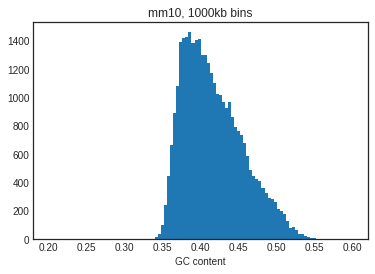

In [6]:
_=plt.hist(bins['GC'].dropna(), range=(0.2, 0.6), bins=100)
plt.xlabel('GC content')
plt.title(f'mm10, {binsize//80}kb bins')

In [13]:
from cooltools.eigdecomp import cooler_cis_eig

lam = {}
eigs = {}
clrs = cooler.Cooler('./bio1_bio2.mcool::resolutions/80000')

lam, eigs = cooler_cis_eig(
    clrs,
    bins,
    n_eigs=1,
    phasing_track_col='GC',
    sort_metric='var_explained')

    # Save text files
lam.to_csv(f'../compartment/bio1_bio2.{binsize//1000}kb.eigs.cis.lam.txt', sep='\t')
eigs.to_csv(f'../compartment/bio1_bio2.{binsize//1000}kb.eigs.cis.vecs.txt', sep='\t', index=False)

    # Save bigwig track
bioframe.to_bigwig(eigs, mm10, f'../compartment/bio1_bio2.{binsize//1000}kb.eigs.cis.vecs.E1.bw', 'E1')

bedGraphToBigWig /tmp/tmpwvnffnwh.bg /tmp/tmp5dvd18vq.chrom.sizes ../compartment/bio1_bio2.80kb.eigs.cis.vecs.E1.bw
